Title: My Title  
Authors :   
- Roland DUTAUZIET  
- Maeva N'GUESSAN  

## <span style="color:#EEE8AA">Configuration du chemin </span>

In [75]:
import os, sys
os.chdir(os.path.dirname(os.path.abspath(__file__))) if "__file__" in locals() else None
sys.path.append(os.path.abspath("C:/Users/dutau/Desktop/ML Appliqué/TP_1/MaevaNGUESSAN_RolandDUTAUZIET_TP1"))


In [76]:
from src.analyse_exploratoire import taux_missing_values_nb, taux_missing_values, is_outlier

## <span style="color:#EEE8AA"> Librairies </span>

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import random 
from tqdm.auto import tqdm

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [78]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder  

import torch
import torch.nn as nn

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<hr>
<h2>Description</h2>
<p>Le jeu de données contenu dans train.csv décrit des candidatures au poste de
chercheur d’or chez OrFée.<br>

<p>Le jeu de données comporte 12 colonnes :<br>
• <b>id</b>  : identifiant unique de chaque ligne<br>
• <b>date</b>  : date de la candidature<br>
•  <b>age</b>: âge du candidat<br>
•  <b>diplome</b>: plus haut diplôme obtenu (bac, licence, master, doctorat)<br>
• <b>specialite</b> : spécialité du diplôme (géologie, forage, détective, archéologie, . . . )<br>
• <b>salaire</b>: salaire demandé<br>
• <b>dispo</b>: oui : disponibilité immédiate, non : pas disponible immédiatement<br>
• <b>sexe</b>: féminin (F) ou masculin (M)<br>
• <b>exp</b> : nombre d’années d’expérience<br>
• <b>cheveux</b> : couleur des cheveux (châtain, brun, blond, roux)<br>
• <b>note</b> : note (sur 100) obtenue à l’exercice de recherche d’or<br>
• <b>embauche</b> : le candidat a-t-il été embauché ? (0 : non, 1 : oui) <br>

## <span style="color:#EEE8AA"> Load Dataset </span>

In [37]:
df = pd.read_csv(r'../data/data.csv',sep=',') #On change ici le sépérateur pour mieux afficher les données. 
df.shape

(20000, 11)

In [38]:
df.sample(5)  # Affiche 5 lignes aléatoires du dataset

,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
8869,20/11/2011,roux,33.0,1.0,29478.0,F,licence,detective,93.55,non,0
1855,13/05/2010,chatain,26.0,14.0,21734.0,F,doctorat,forage,125.80,oui,0
12788,06/06/2012,blond,57.0,14.0,33242.0,M,licence,geologie,66.78,non,0
15676,16/10/2010,blond,41.0,13.0,31138.0,M,master,geologie,92.83,oui,0
13270,18/05/2010,brun,42.0,14.0,40774.0,F,licence,detective,70.87,non,0


On remarque qu'il n'y a pas de colonne id. On va la créer à partir de l'index

In [39]:
df = df.reset_index().rename(columns={'index': 'id'})
df.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,02/06/2012,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,21/04/2011,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,07/09/2012,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,01/07/2011,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,07/08/2012,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


In [40]:
df.columns

Index(['id', 'date', 'cheveux', 'age', 'exp', 'salaire', 'sexe', 'diplome',
       'specialite', 'note', 'dispo', 'embauche'],
      dtype='object')

# <span style="color:#EEE8AA">Analyse descriptive </span>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          20000 non-null  int64  
 1   date        19909 non-null  object 
 2   cheveux     19895 non-null  object 
 3   age         19909 non-null  object 
 4   exp         19904 non-null  object 
 5   salaire     19905 non-null  object 
 6   sexe        19900 non-null  object 
 7   diplome     19891 non-null  object 
 8   specialite  19907 non-null  object 
 9   note        19886 non-null  float64
 10  dispo       19894 non-null  object 
 11  embauche    20000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


On voit qu'il y a 12 variables et 20000 lignes. 
Il y a des missing values pour toutes les variables sauf ID et embauche.

### <span style="color:#EEE8AA">1. Identifier les variables numeriques et categorielles </span>

In [42]:
# EXERCICE : 

# Identifions tout d'abord les colonnes catégorielles
col_categoricals = ['cheveux', 'sexe', 'diplome',
                    'specialite', 'dispo', 'embauche']
# On a dévidé de ne pas prendre 'id' car c'est un identifiant unique
# Puis les numériques
col_numericals = ['age', 'exp', 'salaire', 'note']
# 'date' n'est pas pris en compte car il faudrait le transformer en datetime

print(f"Liste des colonnes catégorielles :\n{col_categoricals}")
print(f"\nListe des colonnes numériques :\n{col_numericals}")

Liste des colonnes catégorielles :
['cheveux', 'sexe', 'diplome', 'specialite', 'dispo', 'embauche']

Liste des colonnes numériques :
['age', 'exp', 'salaire', 'note']


In [43]:
df1 = df.copy()
df1.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,02/06/2012,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,21/04/2011,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,07/09/2012,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,01/07/2011,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,07/08/2012,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


On créer une boucle pour remplacer les valeurs vides ou espaces par des NaN et ensuite convertir en float

In [44]:
# Convertir les données numerique au bon format "SI BESOIN"
#### CODEZ-ICI ####
for col in col_numericals:
    df1[col] = df1[col].replace(['', ' '], np.nan).astype(float)

In [46]:
df1[col_numericals].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      19899 non-null  float64
 1   exp      19894 non-null  float64
 2   salaire  19895 non-null  float64
 3   note     19886 non-null  float64
dtypes: float64(4)
memory usage: 625.1 KB


On voit que les colonnes numériques sont bien en float maintenant.

In [47]:
df1['date']= pd.to_datetime(df1['date'], format='%d/%m/%Y')
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          20000 non-null  int64         
 1   date        19909 non-null  datetime64[ns]
 2   cheveux     19895 non-null  object        
 3   age         19899 non-null  float64       
 4   exp         19894 non-null  float64       
 5   salaire     19895 non-null  float64       
 6   sexe        19900 non-null  object        
 7   diplome     19891 non-null  object        
 8   specialite  19907 non-null  object        
 9   note        19886 non-null  float64       
 10  dispo       19894 non-null  object        
 11  embauche    20000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 1.8+ MB


On voit que la colonne date est bien en datetime maintenant.

### <span style="color:#EEE8AA">2. Analyse de la distribution des variables numeriques </span>

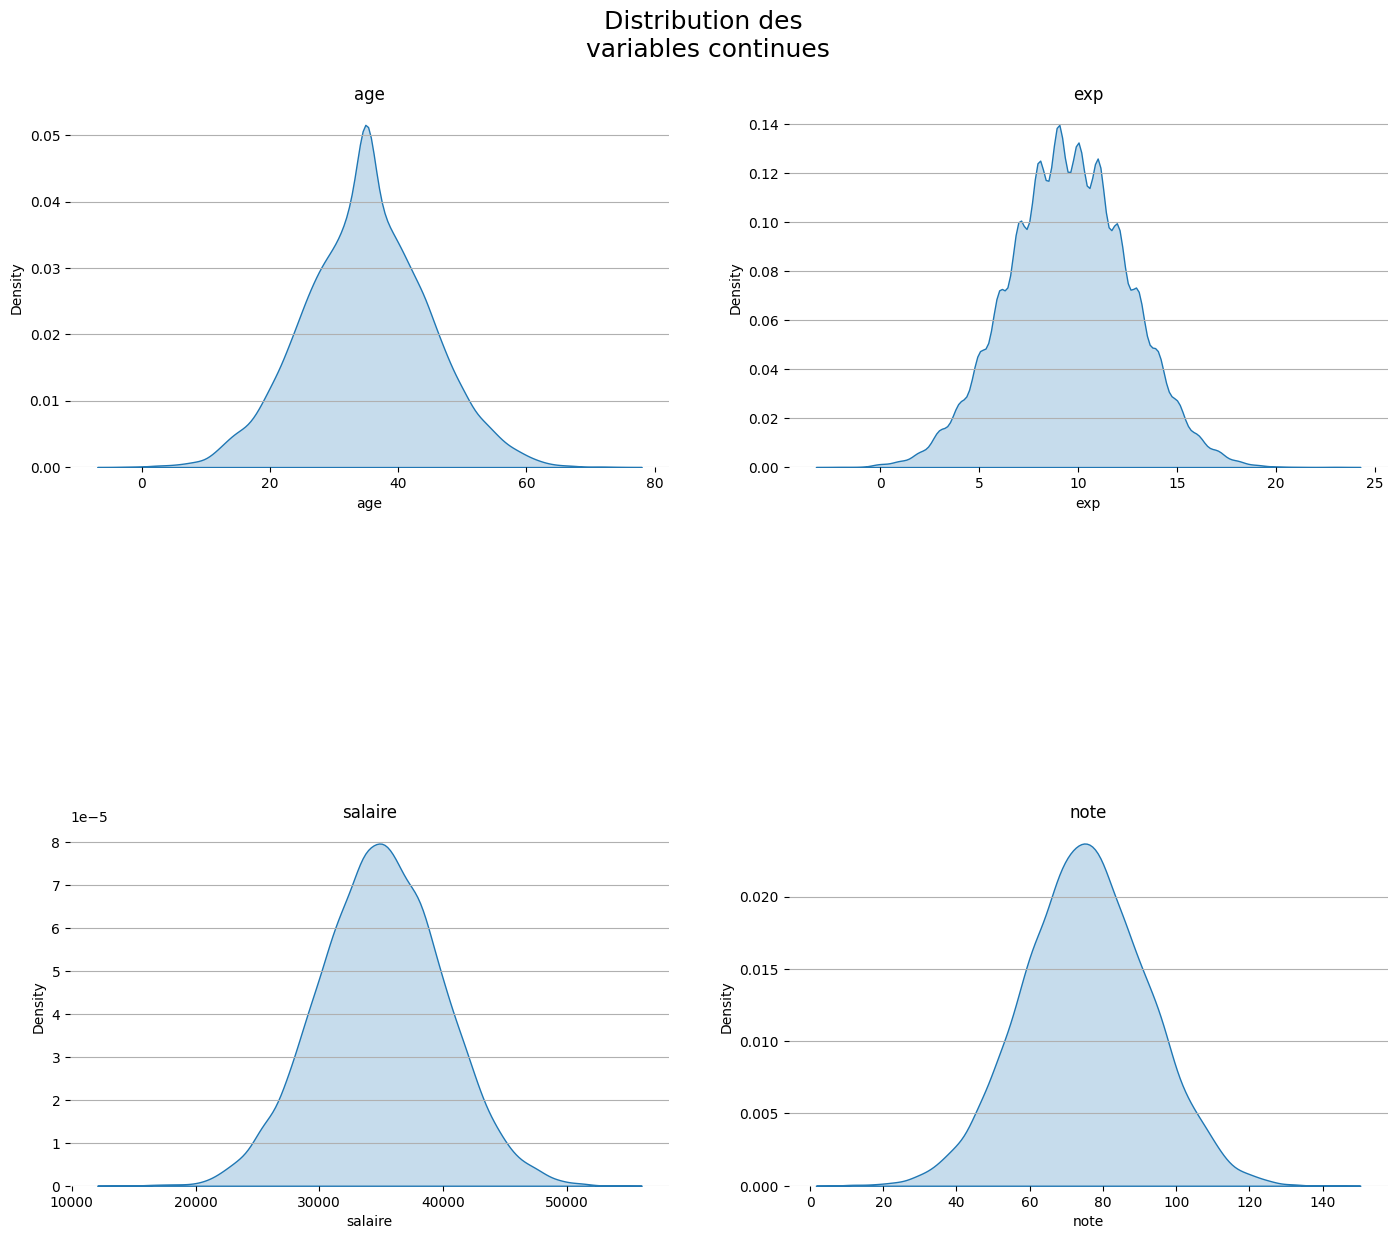

In [48]:
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Distribution des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.kdeplot(ax=ax, data=df1[variable], legend=None, shade=True)
    ax.grid(visible=True, which='major', axis='y') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)



#### Analyse

- On constate que les distributions ont plutot une forme normale.  
- Cependant, on remarque que la variable expérience a une distribution un peu différente avec des pics entre 8 et 12 ans d'expérience. Surement aussi car cette variable est quatitative discrète.

### <span style="color:#EEE8AA">3. Matrice de correlation </span>

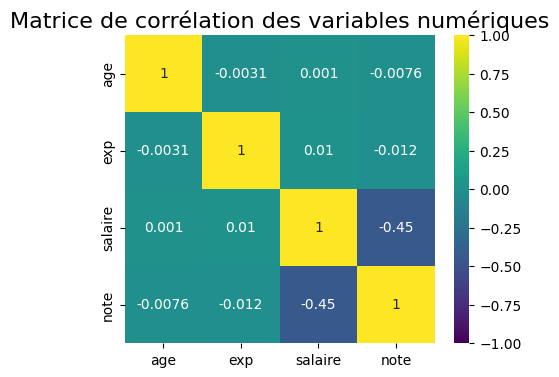

In [49]:
# EXERCICE : 

# Correlation entre les variables numeriques

matrice_corr = df1[col_numericals].corr() # On définit la matrice de corrélation entre les variables numériques

# Heatmap de la matrice de correlation 

plt.figure(figsize=(5, 4))
sns.heatmap(matrice_corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.show() 

# Que pouvez-vous conclure ?

- Il y a forte corrélation négative entre le salaire et la note. Plus la note au test de recherche d'or est élévé et plus le salaire demandé est bas. Autrement dit, les plus "doués" ont des prétentions de salaire plutot modestes.
- Il semble y avoir une corrélation positive mais faible entre l'expérience (exp) et le salaire, ce qui semble logique car généralement, plus une personne a d'expérience, plus son salaire tend à être élevé. 
- La corrélation négative et quasi-nulle entre la note et l'expérience peut être  étrange a priori car on pourrait penser que les années d'expérience n'ont aucun impact sur la note (causalité). Mais on ne doit pas tirer de conclusions hatives directement
- Les autres variables numériques ne montrent pas de corrélations significatives entre elles.

### <span style="color:#EEE8AA">4. Identification des valeurs manquantes </span>

In [79]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux
#            de valeurs manquantes de chaque variable pour chaque type (catégorielle et numérique)
#            par ordre décroissant

taux_missing_values(df1) 

Taux de valeurs manquantes par variable :
note          0.570
diplome       0.545
exp           0.530
dispo         0.530
salaire       0.525
cheveux       0.525
age           0.505
sexe          0.500
specialite    0.465
date          0.455
dtype: float64


#### Que pouvez-vous conclure ?

On remarque que hormis id et embauche, les autres variables ont des valeurs manquantes à hauteur de 0.5% environ.


### <span style="color:#EEE8AA">5. Imputation des valeurs manquantes </span>

#### <span style="color:#EEE8AA">5.1 Variables numeriques </span>

##### <span style="color:#EEE8AA">5.1.1 Imputation par la moyenne </span>

In [80]:
# EXERCICE : Imputation des variables numériques avec la moyenne
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_numericals:  
    df1[f"{col}_imputed_mean"] = df1[col].fillna(df1[col].mean())
    # On crée une nouvelle colonne pour chaque variable numérique


In [82]:
df1[col_numericals].describe()

,age,exp,salaire,note
count,19899.000000,19894.000000,19895.000000,19886.000000
mean,35.004473,9.498794,34975.703443,75.168762
std,9.609154,3.011427,5003.151060,17.095926
min,-3.000000,-2.000000,14128.000000,8.680000
25%,29.000000,7.000000,31597.000000,63.720000
50%,35.000000,9.000000,34979.000000,75.080000
75%,41.000000,12.000000,38361.000000,86.617500
max,74.000000,23.000000,53977.000000,143.220000


In [100]:
col_imputed_mean_numericals = ['age_imputed_mean', 'exp_imputed_mean',
                          'salaire_imputed_mean', 'note_imputed_mean']
df1[col_imputed_mean_numericals].describe()

,age_imputed_mean,exp_imputed_mean,salaire_imputed_mean,note_imputed_mean
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.004473,9.498794,34975.703443,75.168762
std,9.584859,3.003435,4989.999847,17.047131
min,-3.000000,-2.000000,14128.000000,8.680000
25%,29.000000,7.000000,31620.750000,63.807500
50%,35.000000,9.000000,34975.703443,75.168762
75%,41.000000,12.000000,38345.250000,86.550000
max,74.000000,23.000000,53977.000000,143.220000


Le écarts sont très très minimes

##### <span style="color:#EEE8AA">5.1.2 Imputation par la regression </span>

In [98]:
#EXERCICE : Imputation par régression
# Laissez libre cours à votre créativité !
# Pour chaque variable numérique contenant des valeurs manquantes, utilisez les variables explicatives appropriées afin d’imputer les valeurs manquantes à l’aide d’une méthode de régression.

# On peut utiliser par exemple la régression linéaire pour imputer les valeurs manquantes 
# Imputation par régression linéaire

for y in col_numericals:
    print(f"\nImputation de la variable '{y}' par régression linéaire...")

    # Variables explicatives = toutes les autres colonnes numériques
    X = [col for col in col_numericals if col != y]

    # Séparation entre les lignes connues et manquantes pour cette variable
    df1_train = df1[df1[y].notna()].dropna(subset=X)
    df1_missing = df1[df1[y].isna()].dropna(subset=X)

    # Entraînement du modèle
    X_train = df1_train[X]
    y_train = df1_train[y]
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Nouvelle colonne (copie de la colonne d'origine)
    new_col = f"{y}_imputed_regression"
    df1[new_col] = df1[y].copy()

    # Si on a des lignes à prédire
    #if not df1_missing.empty:
    X_missing = df1_missing[X]
    y_pred = model.predict(X_missing)      
    # Remplacement des NaN uniquement dans la nouvelle colonne
    df1.loc[X_missing.index, new_col] = y_pred
    print(f"{len(y_pred)} valeurs imputées pour '{y}'.")



Imputation de la variable 'age' par régression linéaire...
100 valeurs imputées pour 'age'.

Imputation de la variable 'exp' par régression linéaire...
104 valeurs imputées pour 'exp'.

Imputation de la variable 'salaire' par régression linéaire...
105 valeurs imputées pour 'salaire'.

Imputation de la variable 'note' par régression linéaire...
113 valeurs imputées pour 'note'.


In [101]:
col_imputed_regression_numericals = ['age_imputed_regression', 'exp_imputed_regression',
                          'salaire_imputed_regression', 'note_imputed_regression']
df1[col_imputed_regression_numericals].describe()

,age_imputed_regression,exp_imputed_regression,salaire_imputed_regression,note_imputed_regression
count,19999.000000,19998.000000,20000.000000,19999.000000
mean,35.004516,9.498797,34974.917268,75.165377
std,9.585100,3.003587,4993.054685,17.056493
min,-3.000000,-2.000000,14128.000000,8.680000
25%,29.000000,7.000000,31605.750000,63.795000
50%,35.000000,9.000000,34979.000000,75.070000
75%,41.000000,12.000000,38348.250000,86.560000
max,74.000000,23.000000,53977.000000,143.220000


#### Remarque :
- On a encore quelques valeurs manquantes après imputation par régression linéaire car
  certaines lignes avaient des variables explicatives manquantes.
- Vu leur très très faible part, on remplace ces valeurs manquantes par la moyenne

In [103]:
for col in col_imputed_regression_numericals:  
    df1[col] = df1[col].fillna(df1[col].mean())

In [106]:
df1[col_imputed_regression_numericals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_imputed_regression      20000 non-null  float64
 1   exp_imputed_regression      20000 non-null  float64
 2   salaire_imputed_regression  20000 non-null  float64
 3   note_imputed_regression     20000 non-null  float64
dtypes: float64(4)
memory usage: 625.1 KB


##### <span style="color:#EEE8AA">5.1.3 Comparer la distribution des variables imputer </span>

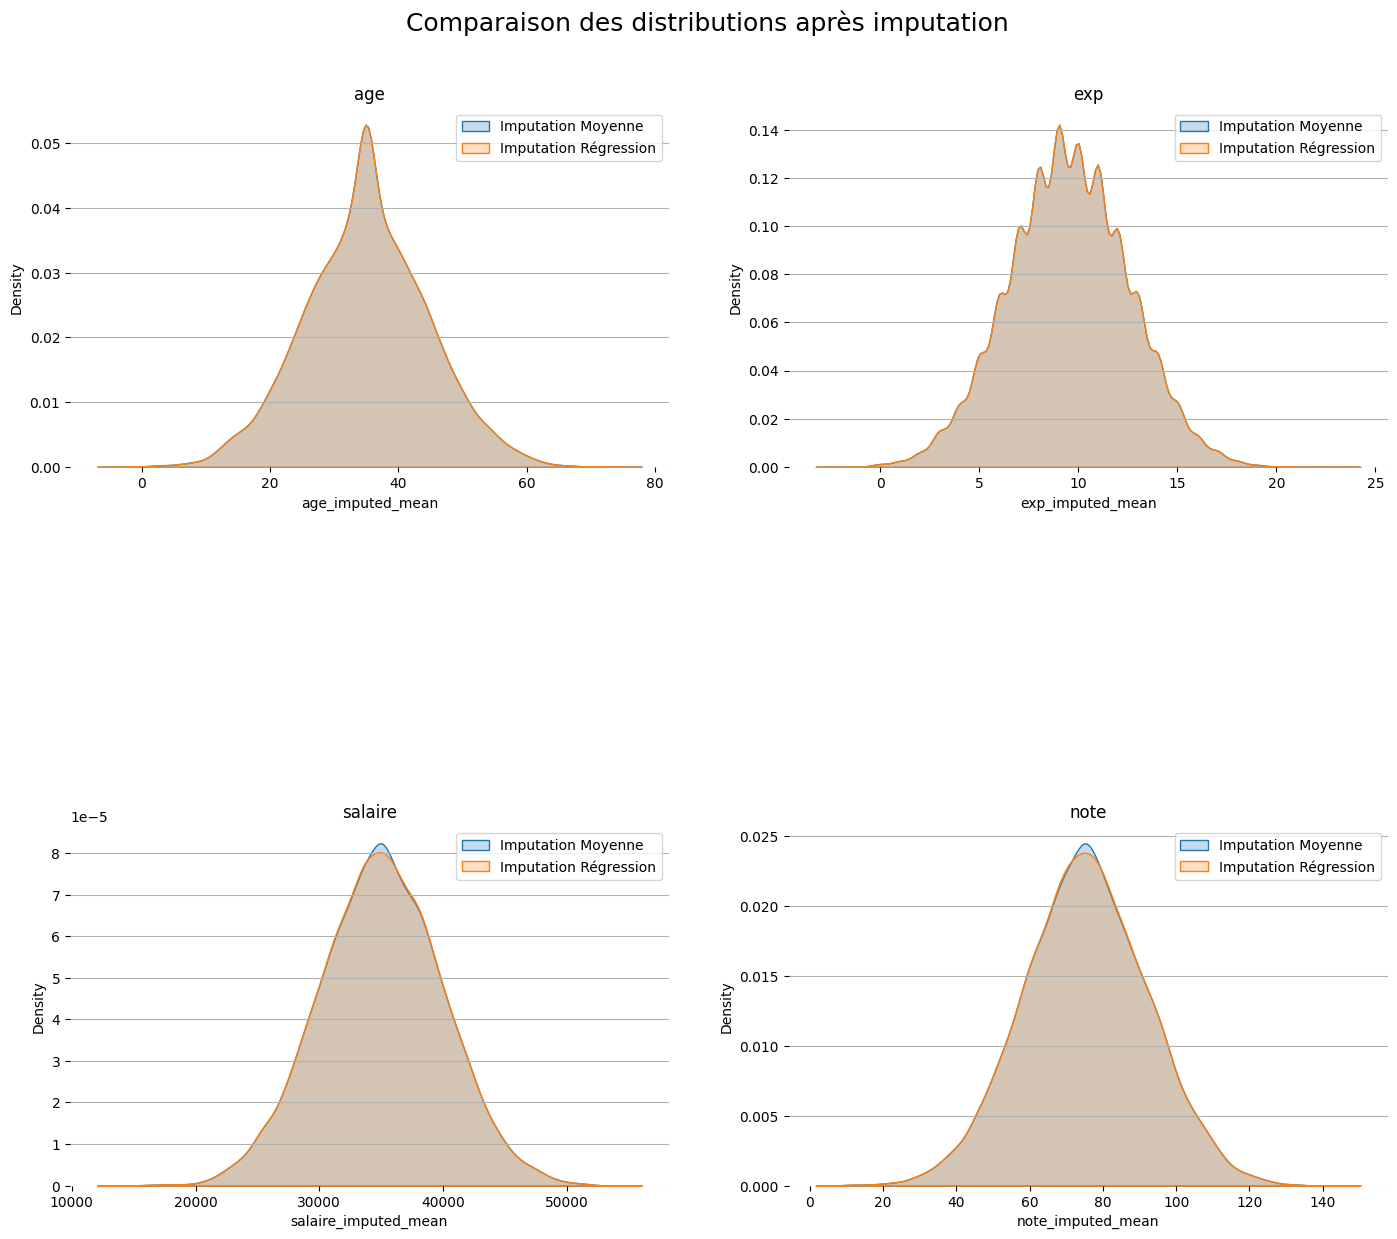

In [109]:
# EXERCICE : Laissez libre court à votre créativité 
# Pour chaque variable numerique
# Comparer la distribution entre l'imputation par la moyenne et l'imputation par Regression


ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Comparaison des distributions après imputation", fontsize=18, y=0.95)
for n, variable in enumerate(col_numericals):
    
    ax = plt.subplot(nrows, ncols, n + 1)

    sns.kdeplot(ax=ax, data=df1[f"{variable}_imputed_mean"], label='Imputation Moyenne', shade=True)
    sns.kdeplot(ax=ax, data=df1[f"{variable}_imputed_regression"], label='Imputation Régression', shade=True)
    
    ax.grid(visible=True, which='major', axis='y') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)
    ax.legend()
    


#### Que pouvez-vous conclure ?

On remarque que les distributions après imputation par régression et par la moyenne sont très proches les unes des autres.

#### <span style="color:#EEE8AA">5.2 Variables categorielles </span>

In [ ]:
# EXERCICE : Utiliser une methode adequate pour imputer les variables categorielles
# Les variables imputées sont enregistrées dans de nouvelles colonnes.

for col in col_categoricals:
    df1[f'{col}_imputed_mode'] = df1[col].fillna(df1[col].mode()[0])
    # On crée une nouvelle colonne pour chaque variable catégorielle

### <span style="color:#EEE8AA">6. Detection des outliers </span>

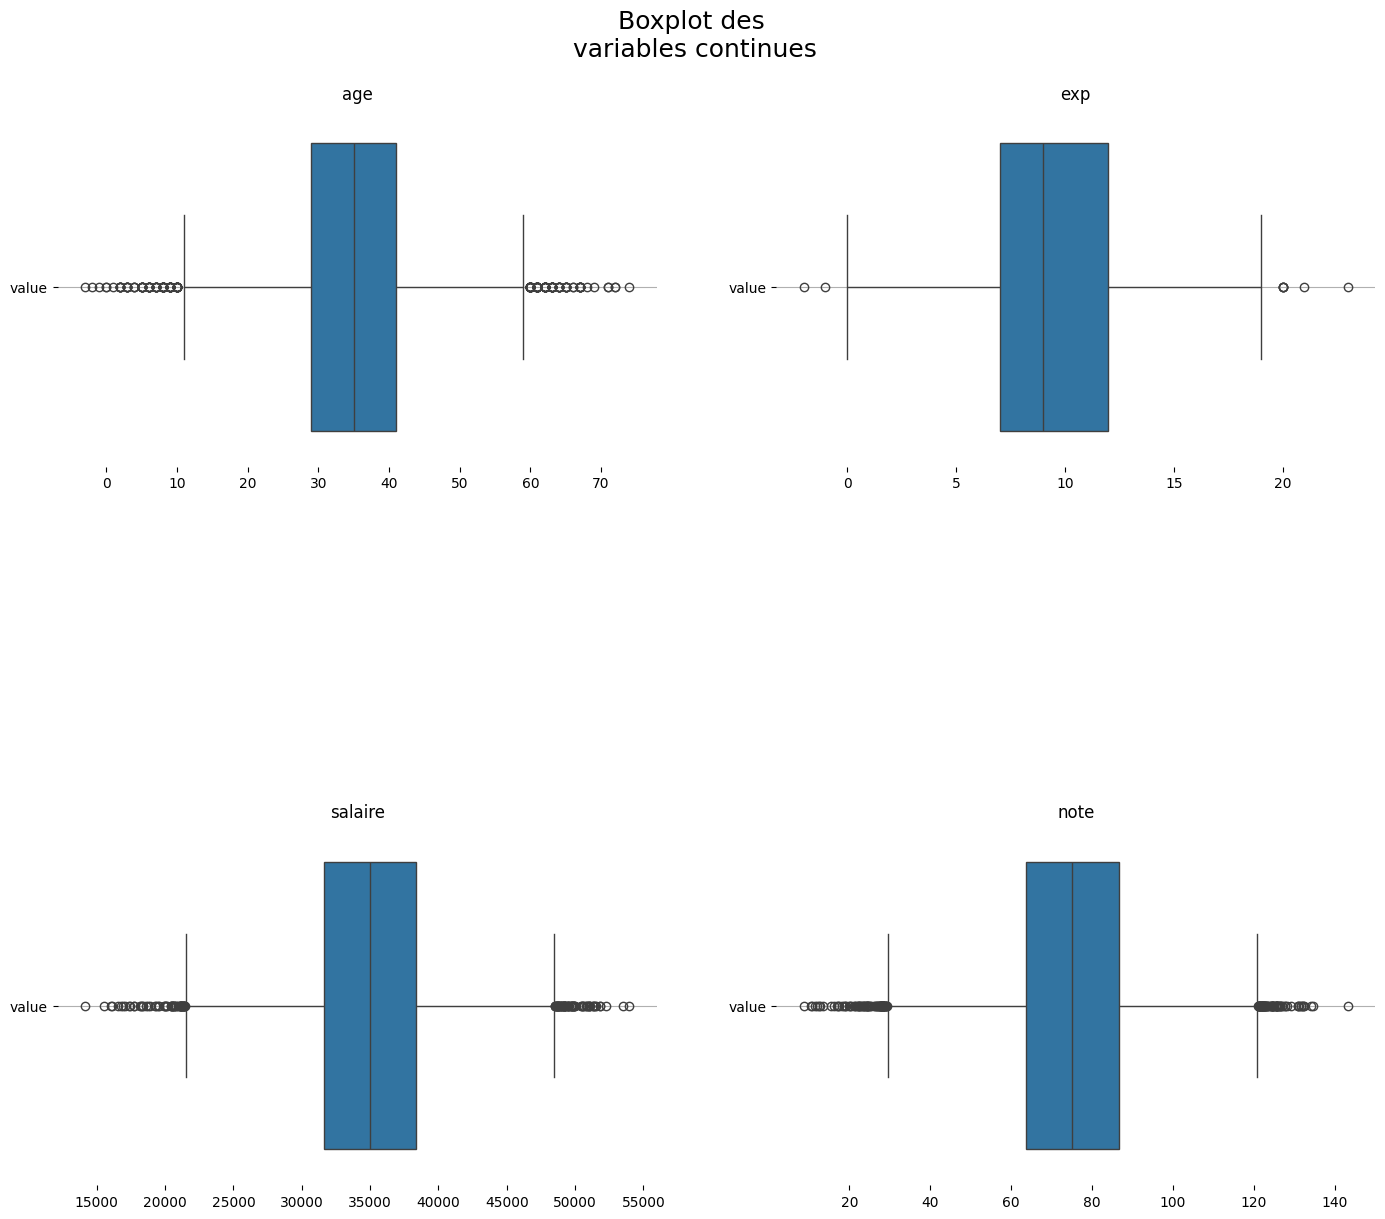

In [111]:
# On affiche les boxplots
temp=pd.melt(df1[col_numericals].reset_index(), id_vars='index', value_vars=col_numericals).iloc[:,-2:] #On change ici avec df1 car c'est le dataframe qui est nettoyé
 
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    # add a new subplot iteratively
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=temp[temp['variable']==variable], orient='h')
    #sns.kdeplot(ax=ax, data=temp[temp['variable']==variable], legend=None, palette=customPalette, shade=True)
    ax.grid(visible=True, which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)


#### Analyse

- Age : 25% de la population a moins de 28ans, la médiane est à 35 ans, et 75% de la population a moins de 42 ans.  
- Expérience : 25% de la population a moins de 6 ans d'expérience, la médiane est à 8 ans, et 25% de la population a plus de 12 ans d'expérience.  
- Salaire : 25% de la population gagne moins de 32000, la médiane est à 35.000 euros par an, et 75% de la population gagne moins de 60000. On a des outliers avec des valeurs tres elevée a plus de 50k.  
- Note : Une moitié de la population a au moins 70/100 en note et il y a des notes qui dépassent 100, ce qui est étrange.  


In [112]:
# EXERCICE : Appliquer votre fonction aux variables numeriques
for col in col_numericals:
    print(f"Outliers dans la colonne {col} :")
    print(is_outlier(df1, col).value_counts())
    print("\n")


Outliers dans la colonne age :
age
0    19785
1      215
Name: count, dtype: int64


Outliers dans la colonne exp :
exp
0    19992
1        8
Name: count, dtype: int64


Outliers dans la colonne salaire :
salaire
0    19877
1      123
Name: count, dtype: int64


Outliers dans la colonne note :
note
0    19851
1      149
Name: count, dtype: int64




#### Que pouvez-vous conclure ?
- On remarque qu'il y a principalement des outliers dans la colonne age, salaire et note. On peut expliquer cela par le fait que certaines personnes ont des âges très élevés (plus de 60 ans), des salaires très élevés (plus de 100k) et des notes qui dépassent 100.  
- Pour l'experience il n'y a pas beaucoup d'outliers car la majorité des personnes ont entre 0 et 20 ans d'expérience et c'est un travail dans lequel on ne trouve pas de personnes avec des expériences très élevées (chercheur d'or)  

In [114]:
# EXERCICE : Laissez libre court à votre créativité et créez une fonction qui affiche le taux et nombre
#            de valeurs manquantes de chaque variable
#            par ordre décroissant

taux_missing_values_nb(df1)

Taux de valeurs manquantes par variable :
note          0.570
diplome       0.545
exp           0.530
dispo         0.530
salaire       0.525
cheveux       0.525
age           0.505
sexe          0.500
specialite    0.465
date          0.455
dtype: float64 

Nombre de valeurs manquantes par variable :
note          114
diplome       109
exp           106
dispo         106
salaire       105
cheveux       105
age           101
sexe          100
specialite     93
date           91
dtype: int64


### <span style="color:#EEE8AA">7. Encodage des variables categorielles </span>

In [115]:
# EXERCICE : Utiliser une methode adequate pour encoder les variables categorielles
label_encoders = {}
for col in col_categoricals:
    le = LabelEncoder()
    df1[f'{col}_encoded'] = le.fit_transform(df1[col].astype(str))
    label_encoders[col] = le  # On stocke l'encodeur pour plus tard


In [116]:
df1.head()

,id,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,...,diplome_imputed_mode,specialite_imputed_mode,dispo_imputed_mode,embauche_imputed_mode,cheveux_encoded,sexe_encoded,diplome_encoded,specialite_encoded,dispo_encoded,embauche_encoded
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,...,licence,geologie,non,0,5,1,3,4,1,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,...,licence,forage,non,0,1,2,3,3,1,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,...,licence,geologie,non,0,1,2,3,4,1,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,...,licence,geologie,non,0,2,2,3,4,1,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,...,licence,detective,non,0,5,1,3,2,1,0


### <span style="color:#011C5D">8. Encodage des variables categorielles Embedding </span>

In [117]:
# Exemple variable
VARIABLE = "cheveux"
df1[VARIABLE] = df1[VARIABLE].fillna("Missing")
MODALITE = df1[VARIABLE].unique()
NB_MODALITE = len(MODALITE)
NB_MODALITE,MODALITE

(6, array(['roux', 'blond', 'brun', 'chatain', 'Missing', ' '], dtype=object))

In [118]:
DIM_EMBEDDING = 10

In [119]:
# Exemple d'embedding avec des weights aleatoire non entraine sur une dataset
embedding = nn.Embedding(NB_MODALITE, DIM_EMBEDDING)

In [120]:
# On encode la variable
df1[VARIABLE+"_label_encoded"] = LabelEncoder().fit_transform(df[VARIABLE])


In [121]:
# On affiche le resultat
df1[[VARIABLE,VARIABLE+"_label_encoded"]].head()

,cheveux,cheveux_label_encoded
0,roux,4
1,blond,1
2,blond,1
3,brun,2
4,roux,4


In [122]:
# On convertit la variable encodée en tenseur torch
variable_to_torch = torch.tensor(df1[VARIABLE+"_label_encoded"].values.tolist())  

In [123]:
# On applique l'embedding
embeddings = embedding(variable_to_torch)

In [124]:
embeddings

tensor([[-0.1278, -0.0732,  0.1955,  ...,  0.4782,  0.1194,  1.0122],
        [-1.6936, -0.2047, -1.6915,  ..., -0.0816, -0.2267, -1.9770],
        [-1.6936, -0.2047, -1.6915,  ..., -0.0816, -0.2267, -1.9770],
        ...,
        [-0.2384, -1.1399, -0.8789,  ..., -0.2867, -2.1934,  1.7054],
        [-0.2384, -1.1399, -0.8789,  ..., -0.2867, -2.1934,  1.7054],
        [-0.6321,  0.9438, -0.0339,  ..., -1.2406,  0.6099, -0.2958]],
       grad_fn=<EmbeddingBackward0>)

In [125]:
# On affiche la shape des embeddings
embeddings.shape

torch.Size([20000, 10])

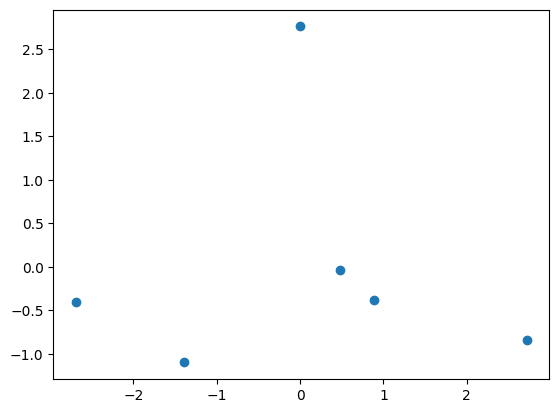

In [126]:
### Visualisation des embeddings
embeddings_weight = embedding.weight.data.numpy()
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_weight)


plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
plt.show()


- On remarque que les modalités sont assez bien séparées dans l'espace 2D.
- On remarque que les points sont assez éloignés les uns des autres, ce qui indique que les embeddings ont réussi à capturer des différences significatives entre les modalités de la variable catégorielle.

### <span style="color:#011C5D">9. Créer votre package python </span>

    - Step 1 : Créer un fichier analyse_exploratoire.py
    - Step 2 : Copier toutes les fonctions de ce notebook dans votre fichier fichier analyse_exploratoire.py
    - Step 3 : Créer un dossier src
    - Step 4 : Deplacer votre fichier analyse_exploratoire.py dans le dossier src
    - Step 5 : Créer un nouveau notebook
    - Step 6 : Dans ce notebook, specifier le chemin vers votre dossier src
    - Step 7 : Executer 'from  analyse_exploratoire import is_outlier, display_missing_values etc...
    - Step 8 : Analyser vos données avec ces nouvelles fonction

## Ressources

Imputation:

- [Imputation Iterrative](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html) 
- [Imputation](https://scikit-learn.org/stable/modules/impute.html) 

Outliers:

- [Doc sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)
- [Doc Medium](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210)